<a href="https://colab.research.google.com/github/YousraFarhani/Bank_Deposit_DeepFeedForward/blob/main/Deep_Feed_Forward_Bank_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
data = pd.read_csv('bank.csv')

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [16]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [17]:
data.value_counts(normalize = True)

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        0.00009
45   management  single    tertiary   no       483      no       no    cellular   23   feb    95        2          265   11        other     yes        0.00009
                 married   tertiary   no       3643     no       no    cellular   21   nov    162       1         -1     0         unknown   no         0.00009
                                               4119     yes      yes   telephone  31   aug    473       2          283   1         success   yes        0.00009
                                               22815    no       no    cellular   26   aug    653       8         -1     0         unknown   no         0.00009
                                                   

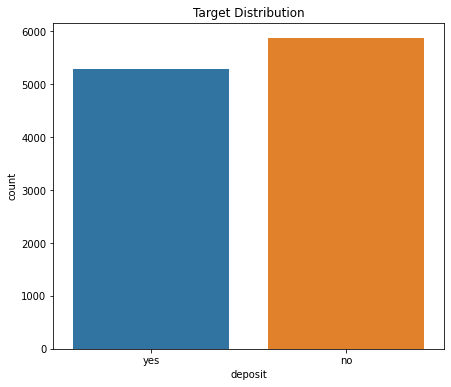

In [19]:
plt.figure(figsize=(7, 6))
sns.countplot(x= data.deposit)
plt.title('Target Distribution')
plt.show()

In [20]:
labelencoder = LabelEncoder()
data["job"] = labelencoder.fit_transform(data["job"])
labelencoder = LabelEncoder()
data["marital"] = labelencoder.fit_transform(data["marital"])
labelencoder = LabelEncoder()
data["education"] = labelencoder.fit_transform(data["education"])
labelencoder = LabelEncoder()
data["default"] = labelencoder.fit_transform(data["default"])
labelencoder = LabelEncoder()
data["housing"] = labelencoder.fit_transform(data["housing"])
labelencoder = LabelEncoder()
data["loan"] = labelencoder.fit_transform(data["loan"])
labelencoder = LabelEncoder()
data["contact"] = labelencoder.fit_transform(data["contact"])
labelencoder = LabelEncoder()
data["month"] = labelencoder.fit_transform(data["month"])
labelencoder = LabelEncoder()
data["poutcome"] = labelencoder.fit_transform(data["poutcome"])
labelencoder = LabelEncoder()
data["deposit"] = labelencoder.fit_transform(data["deposit"])

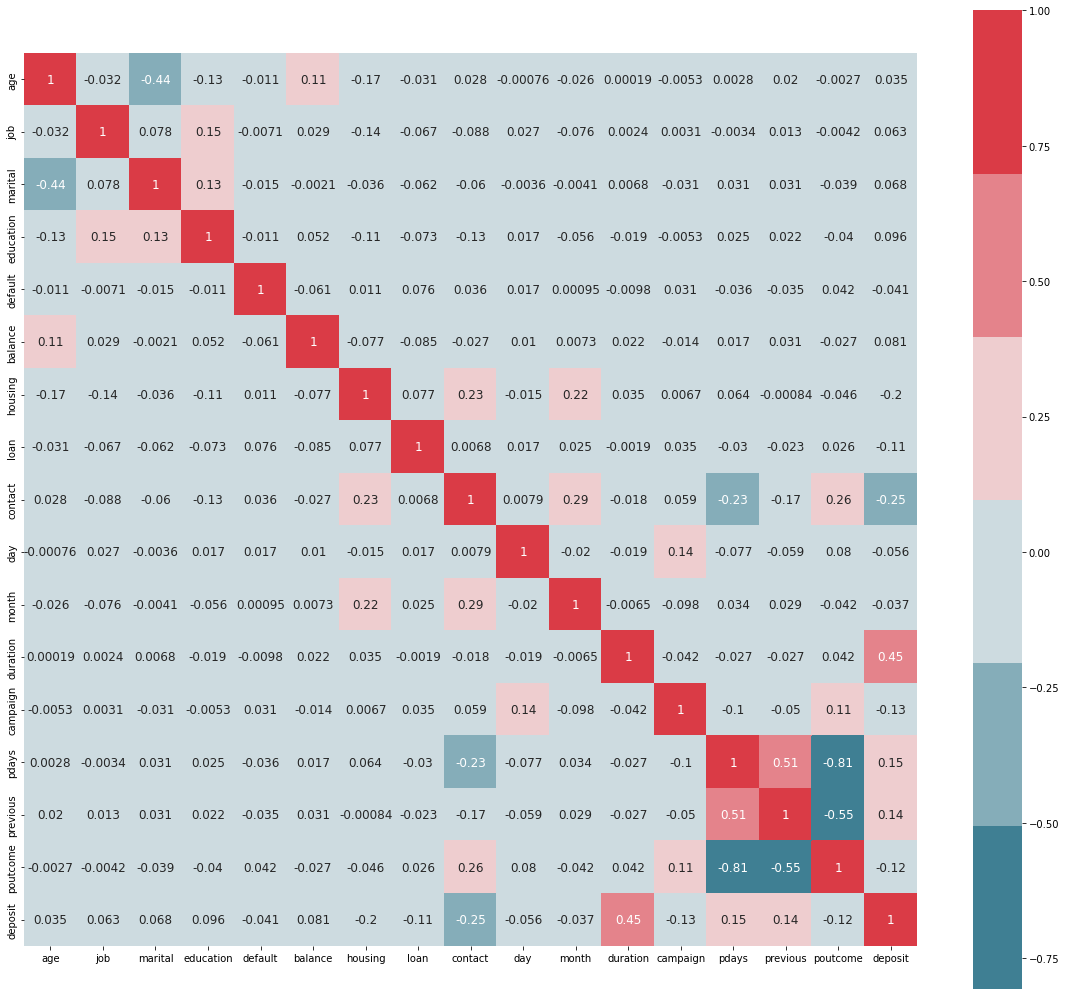

In [24]:
def plot_correlation_map(df):

    corr = df.corr()

    s, ax = plt.subplots(figsize=(20, 20))

    cmap = sns.diverging_palette(220, 10)

    s = sns.heatmap(corr,
                    cmap=cmap,
                    square=True,
                    cbar_kws={'shrink': .9},
                    ax=ax,
                    annot=True,
                    annot_kws={'fontsize': 12})

plot_correlation_map(data)

In [34]:
data1 = data[data['deposit'] == 1]
data2 = data[data['deposit'] == 0]

In [31]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [35]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [36]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,5,2,0,0,604,0,0,0,19,9,187,1,-1,0,3,0
5290,45,0,0,1,0,0,1,0,0,17,9,102,1,-1,0,3,0
5291,48,1,1,1,0,238,1,1,0,2,6,118,2,81,1,2,0
5292,34,0,2,1,0,673,1,0,0,29,4,89,1,260,2,0,0
5293,37,2,1,2,0,7944,0,0,0,21,9,102,1,-1,0,3,0


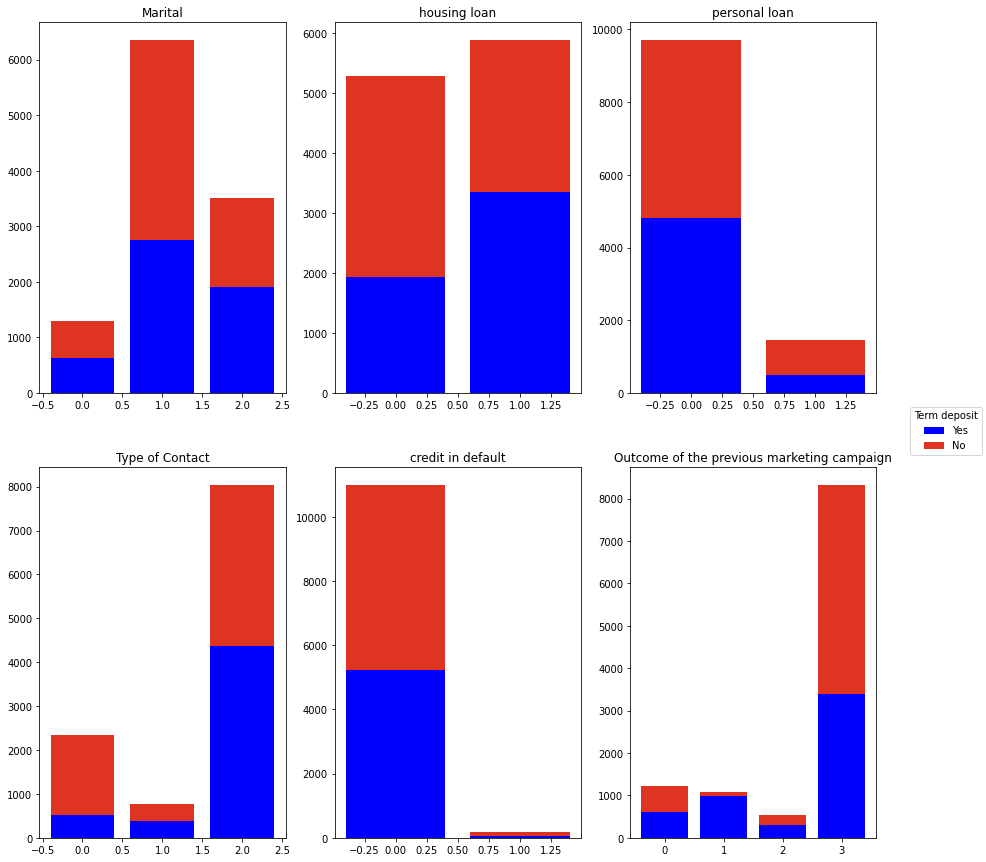

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(15,15))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='blue')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#de3421')

ax[0, 0].title.set_text('Marital')

ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='blue')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#de3421') 
ax[0, 1].title.set_text('housing loan')

ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='blue')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#de3421') 
ax[0, 2].title.set_text('personal loan')

ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='blue')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#de3421') 
ax[1, 0].title.set_text('Type of Contact')

ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='blue')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#de3421') 
ax[1, 1].title.set_text('credit in default')

ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='blue')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#de3421') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')


plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [48]:
from sklearn import preprocessing

In [46]:
X = data.drop(columns=["deposit"],axis=1)
y = data[["deposit"]]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_norm, X_test_norm = preprocessing.normalize(X_train), preprocessing.normalize(X_test)

In [50]:
perp_model = lm.Perceptron()
perp_model.fit(X_train,y_train)
y_pred = perp_model.predict(X_test)
print("Accuracy: ",(accuracy_score(y_test, y_pred)))

Accuracy:  0.5807703792176769


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
X_train_norm, X_test_norm = preprocessing.normalize(X_train), preprocessing.normalize(X_test)

In [56]:
batch_size = 10
num_classes = 10
epochs = 50
stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model = Sequential([
    Dense(256, activation='relu', input_dim= 16),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               4352      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 136,449
Trainable params: 136,449
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_norm,
                 y_train,
                 epochs=50,
                 batch_size=10,
                 validation_split=0.2,
                 callbacks=[])

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.5766 - accuracy: 0.6840 - val_loss: 0.5307 - val_accuracy: 0.7402
Epoch 2/50
625/625 [==============================] - 2s 4ms/step - loss: 0.5314 - accuracy: 0.7294 - val_loss: 0.4955 - val_accuracy: 0.7582
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5192 - accuracy: 0.7451 - val_loss: 0.4912 - val_accuracy: 0.7601
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5153 - accuracy: 0.7469 - val_loss: 0.5259 - val_accuracy: 0.7242
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 0.5092 - accuracy: 0.7570 - val_loss: 0.4982 - val_accuracy: 0.7562
Epoch 6/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5075 - accuracy: 0.7528 - val_loss: 0.4836 - val_accuracy: 0.7684
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 0.5054 - accuracy: 0.7598 - val_loss: 0.4876 - val_accuracy: 0.7492
Epoch 

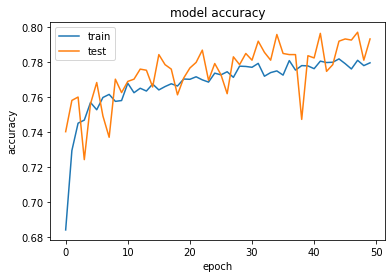

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

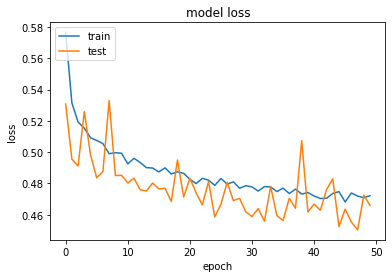

In [59]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
score = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8017318844795227
